In [422]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

In [423]:
df = pd.read_csv("zuu crew scores.csv")
df = df[df['CourseName'] == 'Foundations of ML']
df["Passed"] = df["CapstoneScore"] >= 75
del df['MemberName'], df['CourseName'], df['CapstoneScore']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,Passed
0,3,79.9,43.7,2,0,62.8,5.0,False
1,2,76.8,95.6,6,0,87.4,2.7,True
2,3,96.6,75.9,8,0,98.4,2.8,False
4,2,83.2,24.0,6,0,41.8,4.2,False
7,3,86.5,88.0,5,0,23.9,1.3,False


In [424]:
X = df.drop(columns=['Passed'])
Y = df['Passed'].values 

X.shape

(72, 7)

In [425]:
Y

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True, False, False, False])

In [426]:
logr = LogisticRegression(max_iter=1000)
logr.fit(X, Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [427]:
print("Intercept:", logr.intercept_)
print("Coefficients:", logr.coef_)

Intercept: [-46.7099]
Coefficients: [[-0.1974  0.1364  0.4027 -0.2706  0.4037  0.0353  0.1627]]


In [428]:
Y_hat = logr.predict(X)
Y_hat

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False])

In [429]:
def compute_confusion_matrix(Y, Y_hat):
    TP = np.sum((Y == 1) & (Y_hat == 1))
    FP = np.sum((Y == 0) & (Y_hat == 1))
    TN = np.sum((Y == 0) & (Y_hat == 0))
    FN = np.sum((Y == 1) & (Y_hat == 0))
    return np.array(
                    [
                    [TN, FP],
                    [FN, TP]
                    ],
                    dtype=int
                    )

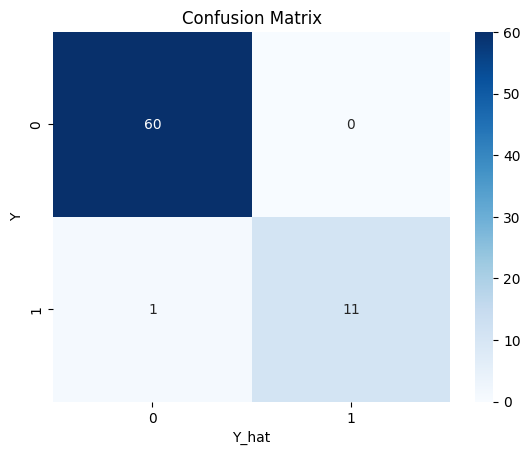

In [430]:
cm = compute_confusion_matrix(Y, Y_hat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Y_hat')
plt.ylabel('Y')
plt.title('Confusion Matrix')
plt.show()

In [431]:
def precision_score(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    return TP / (TP + FP)

def recall_score(cm):
    TP = cm[1,1]
    FN = cm[1,0]
    return TP / (TP +FN)

def f1_score(cm):
    p = precision_score(cm)
    r = recall_score(cm) 
    return (2 * p * r) / (p + r)

def accuracy(cm):
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    TN = cm[0,0]
    return (TP + TN) / (TP + TN + FP + FN)

In [432]:
cm = compute_confusion_matrix(Y, Y_hat) 
p = precision_score(cm)
r = recall_score(cm) 
f1 = f1_score(cm)
acc = accuracy(cm)

print(f"Precision : {p}")
print(f"Recall : {r}")
print(f"F1 Score : {f1}")
print(f"Accuracy : {acc}")

Precision : 1.0
Recall : 0.9166666666666666
F1 Score : 0.9565217391304348
Accuracy : 0.9861111111111112


In [433]:
Y_proba = logr.predict_proba(X)[:, 1]
np.set_printoptions(suppress=True, precision=4)

Y_proba

array([0.    , 0.9775, 0.1421, 0.    , 0.4099, 0.9654, 0.    , 0.    ,
       0.    , 0.    , 0.0001, 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.9994, 0.    , 0.    , 0.9293, 0.0004, 0.    , 0.    , 0.9608,
       0.9579, 0.    , 0.    , 0.    , 0.    , 0.    , 0.9925, 0.    ,
       0.    , 0.0006, 0.0069, 0.0052, 0.    , 0.    , 0.    , 0.0006,
       0.0002, 0.0111, 0.    , 0.0729, 0.    , 0.    , 0.    , 0.    ,
       0.0001, 0.    , 0.3714, 0.    , 0.    , 0.9396, 0.0008, 0.954 ,
       0.1561, 0.0002, 0.0681, 0.1198, 0.    , 0.    , 0.    , 0.925 ,
       0.    , 0.    , 0.0761, 0.    , 0.9561, 0.    , 0.    , 0.    ])

In [434]:
def roc_curve(Y, Y_proba):
    thresholds = np.array([0.3, 0.5, 0.7])

    tpr_list = []
    fpr_list = []

    for t in thresholds:
        y_hat = (Y_proba >= t).astype(int)
        
        TP = np.sum((Y == 1) & (y_hat == 1))
        FP = np.sum((Y == 0) & (y_hat == 1))
        TN = np.sum((Y == 0) & (y_hat == 0))
        FN = np.sum((Y == 1) & (y_hat == 0))

        tpr = TP / (TP + FN)
        fpr = FP / (FP + TN)
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(tpr_list), np.array(fpr_list), np.array(thresholds)

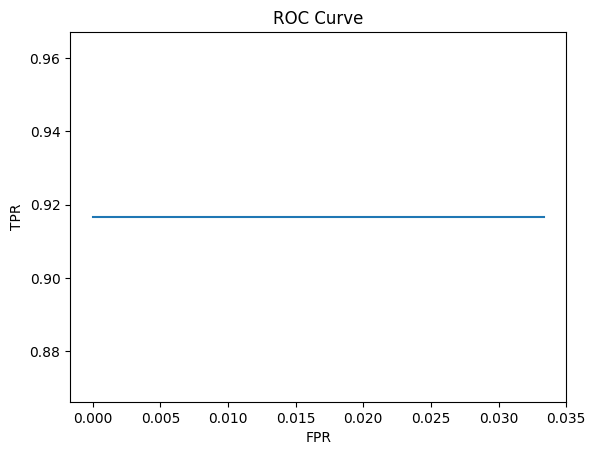

In [435]:
tpr, fpr, _ = roc_curve(Y, Y_proba)

plt.plot(fpr, tpr, label='LogReg')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [436]:
def auc_score(fpr, tpr):
    # Sort by fpr to ensure proper ordering
    sorted_indices = np.argsort(fpr)
    fpr_sorted = fpr[sorted_indices]
    tpr_sorted = tpr[sorted_indices]
    
    # Add (0,0) and (1,1) endpoints if not present
    fpr_sorted = np.concatenate(([0], fpr_sorted, [1]))
    tpr_sorted = np.concatenate(([0], tpr_sorted, [1]))
    
    # Calculate area using trapezoidal rule
    auc = np.trapezoid(tpr_sorted, fpr_sorted)
    return auc

auc = auc_score(fpr, tpr)
print(f"AUC Score: {auc}")

AUC Score: 0.9569444444444444
